# Data Preparation - LMA Features Data

### Note: Datasets follow the format preprocess_datasetname
So we have, for example: Fs_B_dataset1.csv -> Dataset was first Feature Selected and then Balanced

Fs - Feature Selected

B - Balanced

N - Normalized

S - Standardized

## Imports

In [3]:
import ast
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTENC, SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import joblib
from collections import Counter
import numpy as np

### Load Dataset

In [15]:
data = pd.read_csv('datasets/DANCE_WALK_0.5sec.csv')

In [16]:
data.head()

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,l_foot_movement_jerk_z,r_foot_movement_jerk_x,r_foot_movement_jerk_y,r_foot_movement_jerk_z,neck_movement_jerk_x,neck_movement_jerk_y,neck_movement_jerk_z,EMOTION_P,EMOTION_A,EMOTION_D
0,1.347685,0.738734,0.750029,0.265600,0.677576,0.697204,0.544674,0.563073,0.286151,0.278618,...,-0.127215,-0.183632,-0.014360,-0.131762,0.009129,-0.004125,0.078863,-0.35,0.7,-0.8
1,1.348750,0.739083,0.750776,0.264740,0.677642,0.697476,0.544730,0.563324,0.286151,0.278559,...,0.038824,0.076663,-0.000225,0.040033,0.018182,0.000956,-0.015950,-0.35,0.7,-0.8
2,1.345034,0.740744,0.751565,0.264228,0.677716,0.697627,0.544780,0.563463,0.286151,0.278467,...,0.015312,-0.014126,0.006743,0.025519,0.008395,0.002421,0.000979,-0.35,0.7,-0.8
3,1.344209,0.739995,0.749265,0.264495,0.677222,0.696668,0.544343,0.562580,0.286151,0.278507,...,0.124997,0.152861,0.012501,0.117964,-0.027224,0.001080,-0.047545,-0.35,0.7,-0.8
4,1.344109,0.731976,0.743006,0.264412,0.675670,0.694244,0.542910,0.560357,0.286151,0.278629,...,-0.170108,-0.295959,-0.011233,-0.172692,0.015970,-0.004061,0.063067,-0.35,0.7,-0.8


## Feature Selection

In [17]:
data = pd.read_csv('datasets/DANCE_WALK_0.5sec.csv')

In [18]:
y = pd.concat([data.pop(x) for x in ['EMOTION_P', 'EMOTION_A', 'EMOTION_D']], axis=1)
X = data

data.head()

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,r_hand_movement_jerk_z,l_foot_movement_jerk_x,l_foot_movement_jerk_y,l_foot_movement_jerk_z,r_foot_movement_jerk_x,r_foot_movement_jerk_y,r_foot_movement_jerk_z,neck_movement_jerk_x,neck_movement_jerk_y,neck_movement_jerk_z
0,1.347685,0.738734,0.750029,0.265600,0.677576,0.697204,0.544674,0.563073,0.286151,0.278618,...,0.055142,-0.153638,0.011263,-0.127215,-0.183632,-0.014360,-0.131762,0.009129,-0.004125,0.078863
1,1.348750,0.739083,0.750776,0.264740,0.677642,0.697476,0.544730,0.563324,0.286151,0.278559,...,-0.009749,0.012535,-0.003902,0.038824,0.076663,-0.000225,0.040033,0.018182,0.000956,-0.015950
2,1.345034,0.740744,0.751565,0.264228,0.677716,0.697627,0.544780,0.563463,0.286151,0.278467,...,-0.001386,0.067489,-0.003153,0.015312,-0.014126,0.006743,0.025519,0.008395,0.002421,0.000979
3,1.344209,0.739995,0.749265,0.264495,0.677222,0.696668,0.544343,0.562580,0.286151,0.278507,...,-0.055281,0.042252,-0.007135,0.124997,0.152861,0.012501,0.117964,-0.027224,0.001080,-0.047545
4,1.344109,0.731976,0.743006,0.264412,0.675670,0.694244,0.542910,0.560357,0.286151,0.278629,...,0.081867,-0.101168,0.013197,-0.170108,-0.295959,-0.011233,-0.172692,0.015970,-0.004061,0.063067


### Variance Analysis

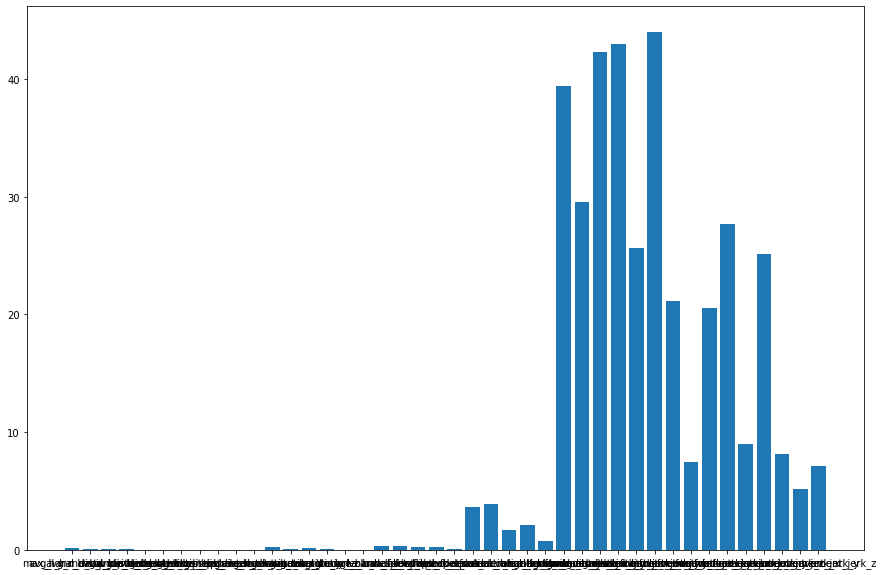

max_hand_distance  -  0.12593434024670325
avg_l_hand_hip_distance  -  0.04566034676584625
avg_r_hand_hip_distance  -  0.04421913153997671
max_stride_length  -  0.04358737728317506
avg_l_hand_chest_distance  -  0.01484967628078187
avg_r_hand_chest_distance  -  0.01480068855346511
avg_l_elbow_hip_distance  -  0.010220034503273004
avg_r_elbow_hip_distance  -  0.0097105891787498
avg_chest_pelvis_distance  -  9.50314291957674e-19
avg_neck_chest_distance  -  2.3207298149601253e-05
avg_neck_rotation_w  -  0.02364199985771469
avg_neck_rotation_x  -  0.22350375457844301
avg_neck_rotation_y  -  0.036141657852427365
avg_neck_rotation_z  -  0.12725847436485954
avg_total_body_volume  -  0.06296126013058914
avg_triangle_area_hands_neck  -  0.00375550939459956
avg_triangle_area_feet_hips  -  0.004319960491152621
l_hand_speed  -  0.34273019387401205
r_hand_speed  -  0.3598387170475211
l_foot_speed  -  0.22737215117637896
r_foot_speed  -  0.28036613936671867
neck_speed  -  0.10835990167639281
l_hand_ac

In [19]:
x_fs = []
y_fs = []
for i in data.columns:
    x_fs.append(data[i].var())
    y_fs.append(i)


fig, ax = plt.subplots(figsize=(15,10))

ax.bar(y_fs, x_fs)

plt.show()

for i in data.columns:
    print(i, " - ", data[i].var())

### Remove highly correlated features

In [20]:
data = pd.read_csv('datasets/DANCE_WALK_0.5sec.csv')

In [21]:
y = pd.concat([data.pop(x) for x in ['EMOTION_P', 'EMOTION_A', 'EMOTION_D']], axis=1)
X = data

data.head()

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,r_hand_movement_jerk_z,l_foot_movement_jerk_x,l_foot_movement_jerk_y,l_foot_movement_jerk_z,r_foot_movement_jerk_x,r_foot_movement_jerk_y,r_foot_movement_jerk_z,neck_movement_jerk_x,neck_movement_jerk_y,neck_movement_jerk_z
0,1.347685,0.738734,0.750029,0.265600,0.677576,0.697204,0.544674,0.563073,0.286151,0.278618,...,0.055142,-0.153638,0.011263,-0.127215,-0.183632,-0.014360,-0.131762,0.009129,-0.004125,0.078863
1,1.348750,0.739083,0.750776,0.264740,0.677642,0.697476,0.544730,0.563324,0.286151,0.278559,...,-0.009749,0.012535,-0.003902,0.038824,0.076663,-0.000225,0.040033,0.018182,0.000956,-0.015950
2,1.345034,0.740744,0.751565,0.264228,0.677716,0.697627,0.544780,0.563463,0.286151,0.278467,...,-0.001386,0.067489,-0.003153,0.015312,-0.014126,0.006743,0.025519,0.008395,0.002421,0.000979
3,1.344209,0.739995,0.749265,0.264495,0.677222,0.696668,0.544343,0.562580,0.286151,0.278507,...,-0.055281,0.042252,-0.007135,0.124997,0.152861,0.012501,0.117964,-0.027224,0.001080,-0.047545
4,1.344109,0.731976,0.743006,0.264412,0.675670,0.694244,0.542910,0.560357,0.286151,0.278629,...,0.081867,-0.101168,0.013197,-0.170108,-0.295959,-0.011233,-0.172692,0.015970,-0.004061,0.063067


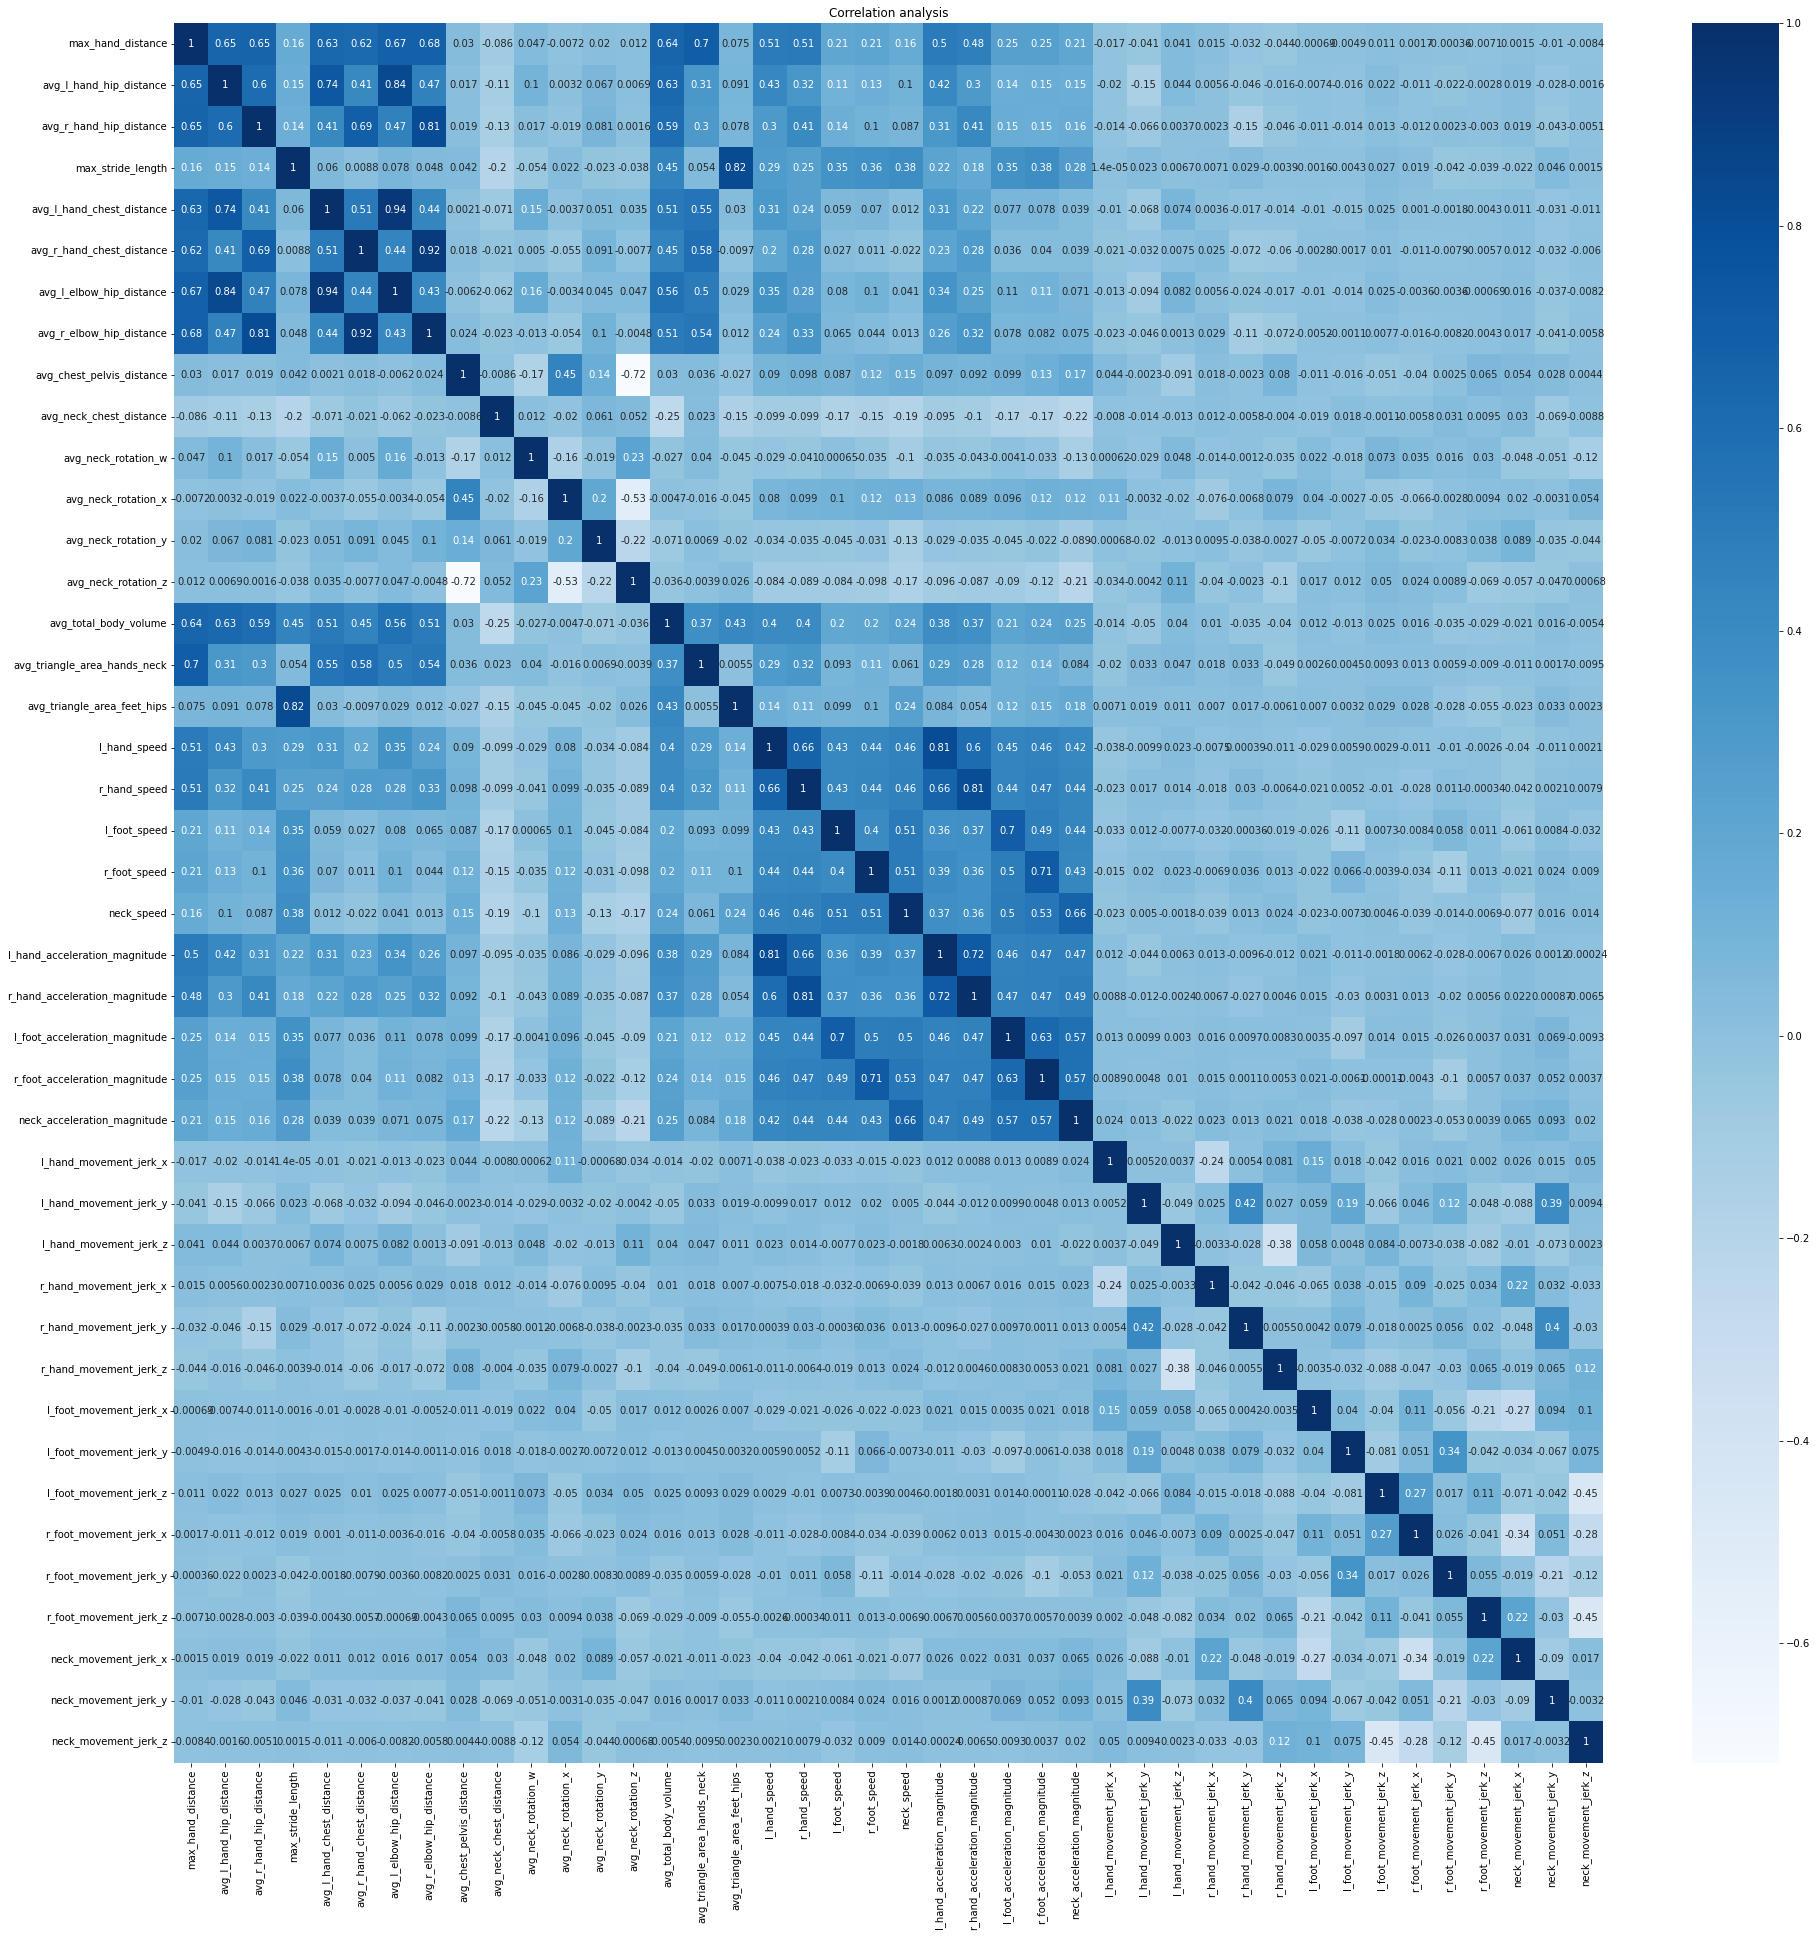

In [22]:
fig = plt.figure(figsize=[32,32])
corr_mtx = data.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

In [23]:
cor_matrix = data.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

[]


In [25]:
df = pd.read_csv('datasets/DANCE_WALK_0.5sec.csv')

cor = df.corr()

#Correlation with output variable
cor_target = abs(cor["EMOTION_P"])
print("===CORRELATION BETWEEN VAR AND PLEASURE COORDINATE===")
print(cor_target)

cor_target = abs(cor["EMOTION_A"])
print("\n===CORRELATION BETWEEN VAR AND AROUSAL COORDINATE===")
print(cor_target)

cor_target = abs(cor["EMOTION_D"])
print("\n===CORRELATION BETWEEN VAR AND DOMINANCE COORDINATE===")
print(cor_target)

===CORRELATION BETWEEN VAR AND PLEASURE COORDINATE===
max_hand_distance                0.357370
avg_l_hand_hip_distance          0.314545
avg_r_hand_hip_distance          0.285848
max_stride_length                0.105709
avg_l_hand_chest_distance        0.268014
avg_r_hand_chest_distance        0.240712
avg_l_elbow_hip_distance         0.280384
avg_r_elbow_hip_distance         0.250865
avg_chest_pelvis_distance        0.017033
avg_neck_chest_distance          0.005258
avg_neck_rotation_w              0.063088
avg_neck_rotation_x              0.060410
avg_neck_rotation_y              0.044272
avg_neck_rotation_z              0.000606
avg_total_body_volume            0.231611
avg_triangle_area_hands_neck     0.231391
avg_triangle_area_feet_hips      0.038027
l_hand_speed                     0.279425
r_hand_speed                     0.249688
l_foot_speed                     0.095185
r_foot_speed                     0.094395
neck_speed                       0.043991
l_hand_acceleration_ma

In [26]:
X = X.drop(columns=[
    "l_hand_movement_jerk_x", "l_hand_movement_jerk_y", "l_hand_movement_jerk_z",
    "r_hand_movement_jerk_x", "r_hand_movement_jerk_y", "r_hand_movement_jerk_z",
    "l_foot_movement_jerk_x", "l_foot_movement_jerk_y", "l_foot_movement_jerk_z",
    "r_foot_movement_jerk_x", "r_foot_movement_jerk_y", "r_foot_movement_jerk_z",
    "neck_movement_jerk_x", "neck_movement_jerk_y", "neck_movement_jerk_z",
])

In [27]:
#Store

fullData = X.join(y, how='right')
fullData.to_csv(r'datasets/Fs_DANCE_WALK_0.5sec.csv', index = False)

In [30]:
data = pd.read_csv('datasets/Fs_DANCE_WALK_0.5sec.csv')

data.head()

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,r_foot_speed,neck_speed,l_hand_acceleration_magnitude,r_hand_acceleration_magnitude,l_foot_acceleration_magnitude,r_foot_acceleration_magnitude,neck_acceleration_magnitude,EMOTION_P,EMOTION_A,EMOTION_D
0,1.347685,0.738734,0.750029,0.265600,0.677576,0.697204,0.544674,0.563073,0.286151,0.278618,...,0.003056,0.003035,0.019870,0.016691,0.043644,0.053025,0.014415,-0.35,0.7,-0.8
1,1.348750,0.739083,0.750776,0.264740,0.677642,0.697476,0.544730,0.563324,0.286151,0.278559,...,0.010137,0.000441,0.072091,0.023939,0.026367,0.014939,0.005996,-0.35,0.7,-0.8
2,1.345034,0.740744,0.751565,0.264228,0.677716,0.697627,0.544780,0.563463,0.286151,0.278467,...,0.011678,0.004609,0.017927,0.015746,0.011888,0.009061,0.009223,-0.35,0.7,-0.8
3,1.344209,0.739995,0.749265,0.264495,0.677222,0.696668,0.544343,0.562580,0.286151,0.278507,...,0.034689,0.006447,0.104179,0.024900,0.065732,0.088783,0.019284,-0.35,0.7,-0.8
4,1.344109,0.731976,0.743006,0.264412,0.675670,0.694244,0.542910,0.560357,0.286151,0.278629,...,0.011147,0.001455,0.074775,0.038912,0.033537,0.085538,0.013481,-0.35,0.7,-0.8


## Data Balancing

In [35]:
data = pd.read_csv('datasets/labels/DANCE_WALK_KIN_0.5sec.csv')
data.head()

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,l_foot_movement_jerk_x,l_foot_movement_jerk_y,l_foot_movement_jerk_z,r_foot_movement_jerk_x,r_foot_movement_jerk_y,r_foot_movement_jerk_z,neck_movement_jerk_x,neck_movement_jerk_y,neck_movement_jerk_z,EMOTION
0,0.684605,0.268051,0.236534,0.478955,0.469381,0.455152,0.351238,0.336392,0.286151,0.278741,...,-1.301589,0.262907,2.773985,0.954402,-0.159601,1.891269,-1.390175,0.250992,2.314484,angry
1,0.438911,0.265254,0.229588,0.283025,0.468163,0.452005,0.350459,0.333469,0.286151,0.278750,...,2.604534,-0.525487,-5.631022,-1.942915,0.316453,-3.736031,2.862457,-0.505018,-4.604725,angry
2,0.440199,0.266441,0.223630,0.309053,0.455287,0.439872,0.343657,0.325378,0.286151,0.278739,...,-1.093538,0.288001,3.019717,1.029735,-0.283431,2.059147,-1.224844,0.062533,2.929292,angry
3,0.500120,0.386881,0.393727,0.452718,0.418828,0.440395,0.324313,0.340373,0.286151,0.278729,...,2.339856,-0.074563,-2.220555,1.330794,0.299717,-1.717227,1.356485,0.381643,-2.760077,angry
4,0.562528,0.447009,0.596923,0.488571,0.361697,0.522971,0.286162,0.430045,0.286151,0.278747,...,-5.387246,0.025001,3.369063,-3.021065,-0.032345,2.294503,-2.909980,-0.303837,3.050193,angry


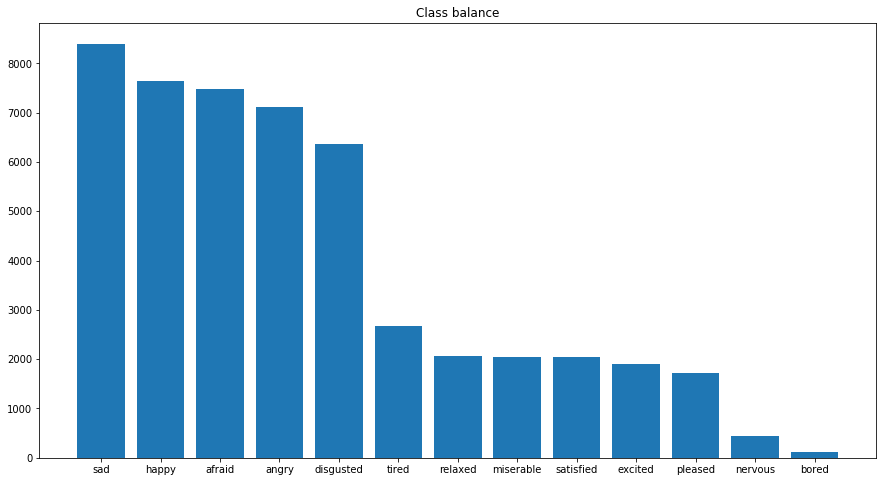

Minority class: 114
Majority class: 7468
Proportion: 0.02 : 1.0


In [36]:
target_count = data['EMOTION'].value_counts()

plt.figure(figsize=(15,8))
plt.title('Class balance')
plt.bar([str(a) for a in target_count.index], target_count.values)
plt.show()
min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

print('Minority class:', target_count[ind_min_class])
print('Majority class:', target_count[1-ind_min_class])
print('Proportion:', round(target_count[ind_min_class] / target_count[1-ind_min_class], 2), ': 1.0')

Class=angry, n=7104 (14.214%)
Class=happy, n=7640 (15.287%)
Class=sad, n=8398 (16.803%)
Class=disgusted, n=6364 (12.734%)
Class=afraid, n=7468 (14.943%)
Class=excited, n=1900 (3.802%)
Class=tired, n=2680 (5.362%)
Class=pleased, n=1718 (3.438%)
Class=satisfied, n=2042 (4.086%)
Class=bored, n=114 (0.228%)
Class=relaxed, n=2064 (4.130%)
Class=miserable, n=2046 (4.094%)
Class=nervous, n=440 (0.880%)


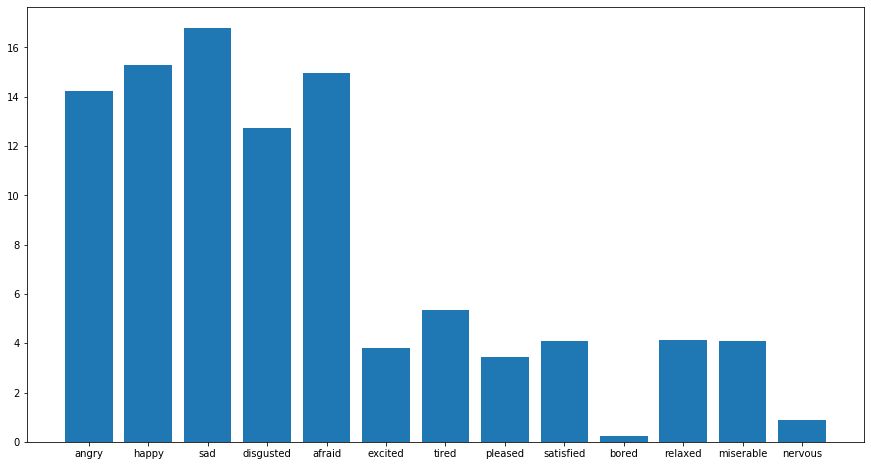

In [38]:
data = pd.read_csv('datasets/labels/DANCE_WALK_KIN_0.5sec.csv')


values = data.values
# split into input and output elements
X, y = values[:, :-1], values[:, -1]

# summarize distribution
counter = Counter(y)
perc = []
for k,v in counter.items():
    per = v / len(y) * 100
    perc.append(per)
    print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
    
    
# plot the distribution
plt.figure(figsize=(15,8))
plt.bar(counter.keys(), perc)
plt.show()

### Undersample

Class=afraid, n=1000 (8.188%)
Class=angry, n=1000 (8.188%)
Class=bored, n=28 (0.229%)
Class=disgusted, n=1000 (8.188%)
Class=excited, n=474 (3.881%)
Class=happy, n=1000 (8.188%)
Class=miserable, n=509 (4.168%)
Class=nervous, n=110 (0.901%)
Class=pleased, n=428 (3.504%)
Class=relaxed, n=513 (4.200%)
Class=sad, n=1000 (8.188%)
Class=satisfied, n=509 (4.168%)
Class=tired, n=667 (5.461%)


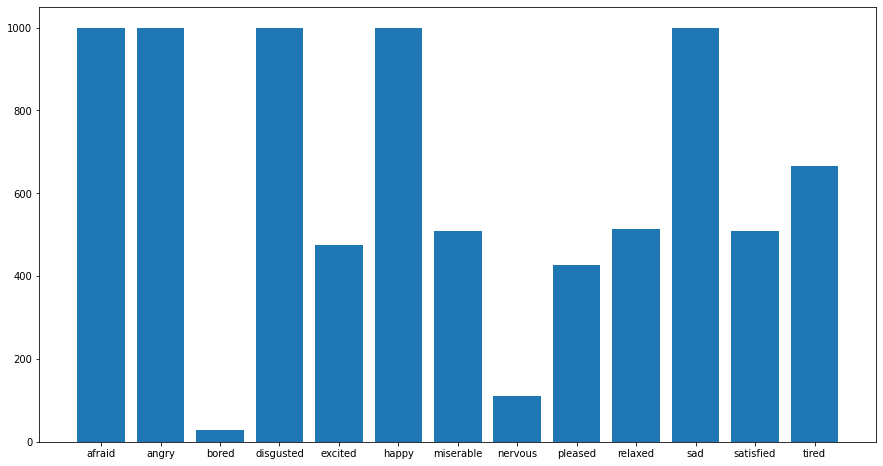

In [128]:
#strategy = {"angry":339, "happy": 400, "sad": 338, "afraid": 385, "pleased": 400, "bored": 28, "tired": 400, "relaxed": 400, "excited": 400, "miserable": 400, "satisfied": 400, "nervous": 110}
strategy = {"angry":1000,"disgusted":1000, "happy": 1000, "sad": 1000, "afraid": 1000, "pleased": 428, "bored": 28, "tired": 667, "relaxed": 513, "excited": 474, "miserable": 509, "satisfied": 509, "nervous": 110}


nm = NearMiss(sampling_strategy=strategy)
X_res, y_res = nm.fit_resample(X, y)

# summarize distribution
counter = Counter(y_res)
perc = []
for k,v in counter.items():
    per = v / len(y) * 100
    perc.append(per)
    print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
    
    
# plot the distribution
plt.figure(figsize=(15,8))
plt.bar(counter.keys(), counter.values())
plt.show()

### SMOTE

Class=afraid, n=600 (7.692%)
Class=angry, n=600 (7.692%)
Class=bored, n=600 (7.692%)
Class=disgusted, n=600 (7.692%)
Class=excited, n=600 (7.692%)
Class=happy, n=600 (7.692%)
Class=miserable, n=600 (7.692%)
Class=nervous, n=600 (7.692%)
Class=pleased, n=600 (7.692%)
Class=relaxed, n=600 (7.692%)
Class=sad, n=600 (7.692%)
Class=satisfied, n=600 (7.692%)
Class=tired, n=600 (7.692%)


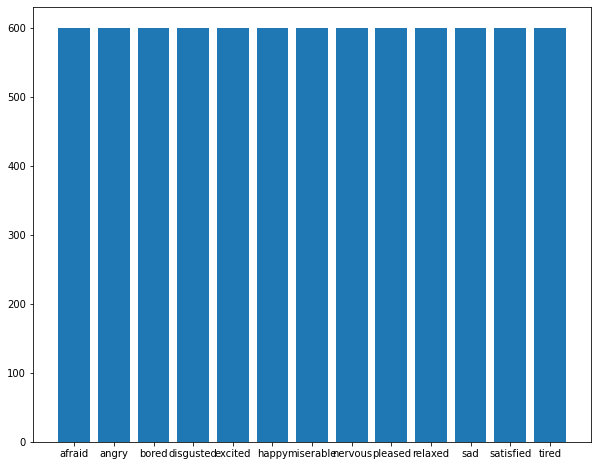

In [111]:
#strategy = {"angry":400, "happy": 400, "sad": 400, "afraid": 400, "pleased": 400, "bored": 400, "tired": 400, "relaxed": 400, "excited": 400, "miserable": 400, "satisfied": 400, "nervous": 400}
strategy = {"angry":600, "happy": 600, "sad": 600, "afraid": 600, "pleased": 600, "bored": 600, "tired": 600, "relaxed": 600, "excited": 600, "miserable": 600, "satisfied": 600, "nervous": 600, "disgusted": 600}


# transform the dataset
oversample = SMOTE(sampling_strategy=strategy)
X, y = oversample.fit_resample(X_res, y_res)

# summarize distribution
counter = Counter(y)
perc = []
for k,v in counter.items():
    per = v / len(y) * 100
    perc.append(per)
    print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
    
# plot the distribution
plt.figure(figsize=(10,8))
plt.bar(counter.keys(), counter.values())
plt.show()

### Store data

In [28]:
conv_dict = {
    "angry": (-0.5, 0.6, 0.9),
    "happy": (0.6, 0.5, 0.2),
    "sad": (-0.6, -0.3, -0.3),
    "disgusted": (-0.4, 0.25, -0.1) ,
    "afraid": (-0.35, 0.7, -0.8),
    "pleased": (0.7, 0.2, 0.2),
    "bored": (-0.5, -0.7, -0.25),
    "tired": (0.1, -0.7, -0.2),
    "relaxed": (0.6, -0.55, 0.1),
    "excited": (0.5, 0.7, 0.4),
    "miserable": (-0.85, -0.1, -0.8),
    "nervous": (-0.3, -0.66, -0.7),
    "satisfied": (0.9, -0.25, 0.65),   
}

In [1]:
header = ["max_hand_distance",
          "avg_l_hand_hip_distance",
          "avg_r_hand_hip_distance",
          "max_stride_length",
          "avg_l_hand_chest_distance",
          "avg_r_hand_chest_distance",
          "avg_l_elbow_hip_distance",
          "avg_r_elbow_hip_distance",
          #"avg_chest_pelvis_distance",
          "avg_neck_chest_distance",
          "avg_neck_rotation_w", "avg_neck_rotation_x", "avg_neck_rotation_y", "avg_neck_rotation_z",
          "avg_total_body_volume",
          "avg_triangle_area_hands_neck",
          "avg_triangle_area_feet_hips",
          
          "l_hand_speed",
          "r_hand_speed",
          "l_foot_speed",
          "r_foot_speed",
          "neck_speed",
          
          "l_hand_acceleration_magnitude",
          "r_hand_acceleration_magnitude",
          "l_foot_acceleration_magnitude",
          "r_foot_acceleration_magnitude",
          "neck_acceleration_magnitude",
          
          #"l_hand_movement_jerk_x", "l_hand_movement_jerk_y", "l_hand_movement_jerk_z",
          #"r_hand_movement_jerk_x", "r_hand_movement_jerk_y", "r_hand_movement_jerk_z",
          #"l_foot_movement_jerk_x", "l_foot_movement_jerk_y", "l_foot_movement_jerk_z",
          #"r_foot_movement_jerk_x", "r_foot_movement_jerk_y", "r_foot_movement_jerk_z",
          #"neck_movement_jerk_x", "neck_movement_jerk_y", "neck_movement_jerk_z",
          
          "EMOTION_P", "EMOTION_A", "EMOTION_D"
         ]

forbidden_index = [8, 27,28,29, 30,31,32, 33,34,35, 36,37,38, 39,40,41]

with open('datasets/Fs2_B_DANCE_WALK_KIN_0.5sec.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(header)

    for i in range(0,len(y)):
        new_row = []
        for j in range(0,len(X[i])):
            if(j in forbidden_index):
                continue
            new_row.append(X[i][j])
                
        emotion = y[i]
        if emotion == "scared":
            emotion = "afraid"
        elif(emotion == "neutral" or emotion == "bored" or emotion == "nervous"):
            continue
                
        coordinates = conv_dict[emotion]
        new_row.append(coordinates[0])
        new_row.append(coordinates[1])
        new_row.append(coordinates[2])

        writer.writerow(new_row)

NameError: name 'csv' is not defined

In [40]:
data = pd.read_csv('datasets/Fs2_B_DANCE_WALK_KIN_0.5sec.csv')

data.head()

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_neck_chest_distance,avg_neck_rotation_w,...,r_foot_speed,neck_speed,l_hand_acceleration_magnitude,r_hand_acceleration_magnitude,l_foot_acceleration_magnitude,r_foot_acceleration_magnitude,neck_acceleration_magnitude,EMOTION_P,EMOTION_A,EMOTION_D
0,0.684605,0.268051,0.236534,0.478955,0.469381,0.455152,0.351238,0.336392,0.278741,0.011497,...,0.531111,0.677884,1.109843,0.766334,1.537713,1.062221,1.355767,-0.5,0.6,0.9
1,0.438911,0.265254,0.229588,0.283025,0.468163,0.452005,0.350459,0.333469,0.278750,0.011885,...,0.014436,0.021416,1.085836,0.779991,1.575538,1.049393,1.367237,-0.5,0.6,0.9
2,0.440199,0.266441,0.223630,0.309053,0.455287,0.439872,0.343657,0.325378,0.278739,0.017740,...,0.072819,0.191442,1.231576,1.117785,0.133194,0.126177,0.355767,-0.5,0.6,0.9
3,0.500120,0.386881,0.393727,0.452718,0.418828,0.440395,0.324313,0.340373,0.278729,0.033718,...,0.464108,0.605356,1.068333,1.038694,1.638293,1.021144,1.332992,-0.5,0.6,0.9
4,0.562528,0.447009,0.596923,0.488571,0.361697,0.522971,0.286162,0.430045,0.278747,0.041425,...,0.139125,0.207208,1.304347,1.077684,1.563165,0.917321,0.803440,-0.5,0.6,0.9


In [41]:
print(data.shape)

(49424, 29)


## Outliers

In [47]:
from scipy import stats

In [48]:
data = pd.read_csv('datasets/Fs2_B_DANCE_WALK_KIN_0.5sec.csv')
print(data.shape)

(49424, 29)


In [49]:
data.iloc[0]

max_hand_distance                0.684605
avg_l_hand_hip_distance          0.268051
avg_r_hand_hip_distance          0.236534
max_stride_length                0.478955
avg_l_hand_chest_distance        0.469381
avg_r_hand_chest_distance        0.455152
avg_l_elbow_hip_distance         0.351238
avg_r_elbow_hip_distance         0.336392
avg_neck_chest_distance          0.278741
avg_neck_rotation_w              0.011497
avg_neck_rotation_x             -0.143410
avg_neck_rotation_y             -0.065563
avg_neck_rotation_z              0.987096
avg_total_body_volume            0.100081
avg_triangle_area_hands_neck     0.151735
avg_triangle_area_feet_hips      0.118982
l_hand_speed                     0.554922
r_hand_speed                     0.383167
l_foot_speed                     0.768857
r_foot_speed                     0.531111
neck_speed                       0.677884
l_hand_acceleration_magnitude    1.109843
r_hand_acceleration_magnitude    0.766334
l_foot_acceleration_magnitude    1

In [50]:
data = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]
data.shape

(40566, 29)

In [51]:
data.iloc[0]

max_hand_distance                0.684605
avg_l_hand_hip_distance          0.268051
avg_r_hand_hip_distance          0.236534
max_stride_length                0.478955
avg_l_hand_chest_distance        0.469381
avg_r_hand_chest_distance        0.455152
avg_l_elbow_hip_distance         0.351238
avg_r_elbow_hip_distance         0.336392
avg_neck_chest_distance          0.278741
avg_neck_rotation_w              0.011497
avg_neck_rotation_x             -0.143410
avg_neck_rotation_y             -0.065563
avg_neck_rotation_z              0.987096
avg_total_body_volume            0.100081
avg_triangle_area_hands_neck     0.151735
avg_triangle_area_feet_hips      0.118982
l_hand_speed                     0.554922
r_hand_speed                     0.383167
l_foot_speed                     0.768857
r_foot_speed                     0.531111
neck_speed                       0.677884
l_hand_acceleration_magnitude    1.109843
r_hand_acceleration_magnitude    0.766334
l_foot_acceleration_magnitude    1

In [52]:
data.to_csv(r'datasets/Fs2_B_O_DANCE_WALK_KIN_0.5sec.csv', index = False)

## Data Standardization

In [53]:
data = pd.read_csv('datasets/Fs2_B_O_DANCE_WALK_KIN_0.5sec.csv')

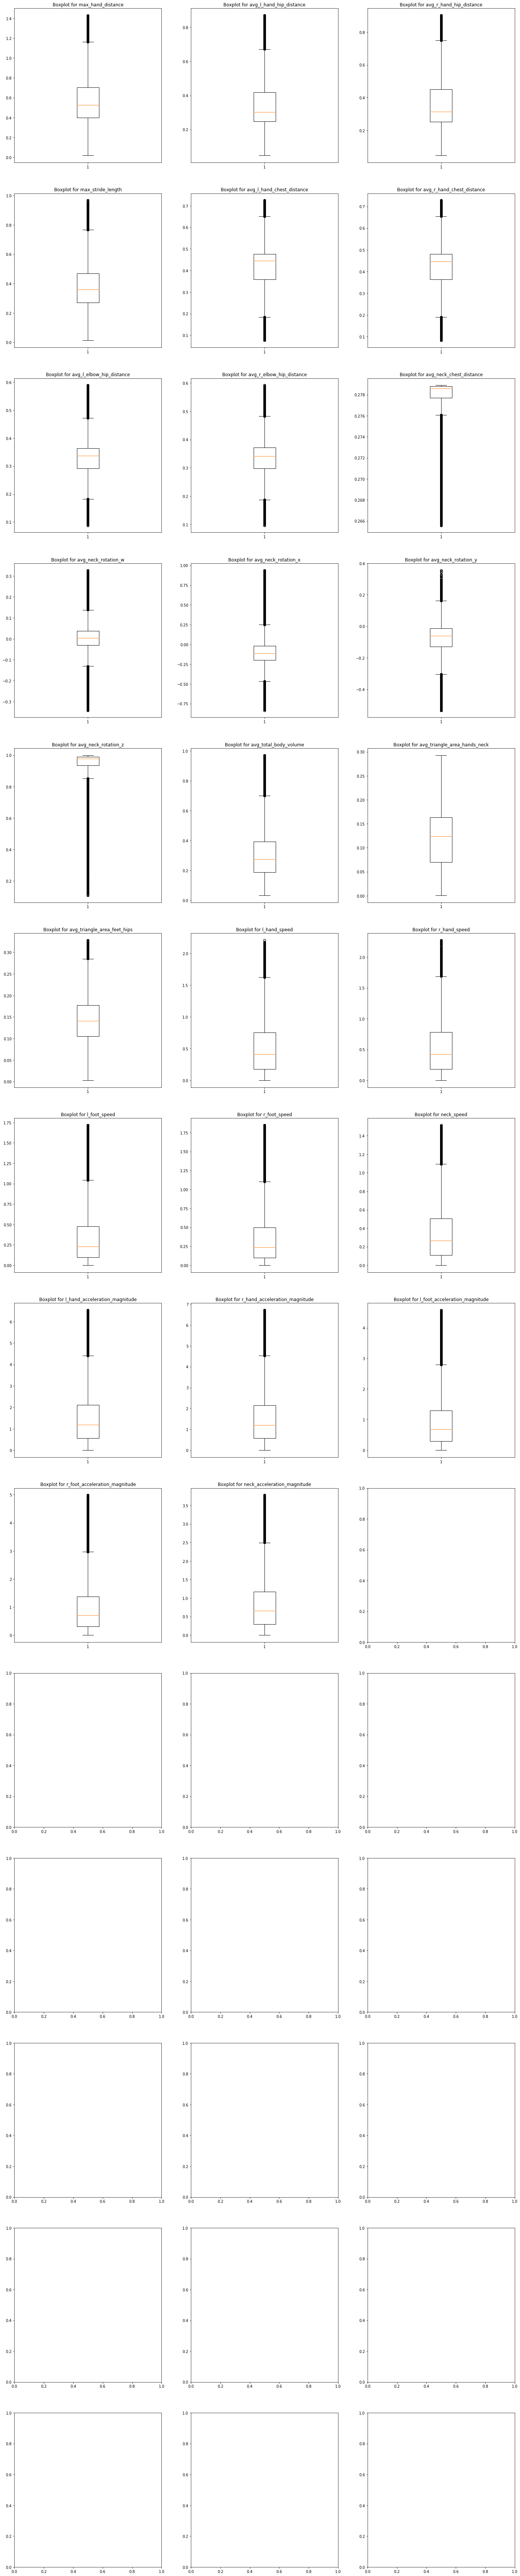

In [54]:
target = pd.concat([data.pop(x) for x in ['EMOTION_P', 'EMOTION_A', 'EMOTION_D']], axis=1)

numeric_vars = data.columns

rows = 14
cols = 3

fig, axs = plt.subplots(rows, cols, figsize=(cols * 8, rows * 9))
i, j = 0, 0

off=0
for n in range(len(numeric_vars)):
    num_unique = len(list(set(data[numeric_vars[n]].values)))
    axs[i, j].set_title('Boxplot for %s'%numeric_vars[n])
    axs[i, j].boxplot(data[numeric_vars[n]].dropna().values)
    
    i, j = (i + 1, 0) if (n+1-off) % cols == 0 else (i, j + 1)
    
plt.show()

In [55]:
numeric_data = data

transf = StandardScaler(copy=True).fit(numeric_data)
minMaxData = pd.DataFrame(transf.transform(numeric_data), columns = numeric_data.columns)
minMaxData.describe(include='all')

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_neck_chest_distance,avg_neck_rotation_w,...,l_hand_speed,r_hand_speed,l_foot_speed,r_foot_speed,neck_speed,l_hand_acceleration_magnitude,r_hand_acceleration_magnitude,l_foot_acceleration_magnitude,r_foot_acceleration_magnitude,neck_acceleration_magnitude
count,4.056600e+04,4.056600e+04,4.056600e+04,4.056600e+04,4.056600e+04,4.056600e+04,4.056600e+04,4.056600e+04,4.056600e+04,4.056600e+04,...,4.056600e+04,4.056600e+04,4.056600e+04,4.056600e+04,4.056600e+04,4.056600e+04,4.056600e+04,4.056600e+04,4.056600e+04,4.056600e+04
mean,7.006288e-18,-8.407546e-18,-4.764276e-17,-1.961761e-17,3.846452e-16,-1.261132e-17,-2.129912e-16,-4.399949e-16,8.614232e-15,-2.242012e-17,...,-6.025408e-17,6.585911e-17,9.388426e-17,-4.904402e-17,3.923521e-17,1.121006e-16,2.242012e-17,4.904402e-17,8.267420e-17,-1.471321e-16
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,...,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00
min,-2.095686e+00,-2.081828e+00,-2.016341e+00,-2.347143e+00,-3.159118e+00,-3.146941e+00,-3.326568e+00,-3.242074e+00,-5.300714e+00,-4.113382e+00,...,-1.207337e+00,-1.213539e+00,-1.030956e+00,-1.020020e+00,-1.186050e+00,-1.230785e+00,-1.229441e+00,-1.122912e+00,-1.096923e+00,-1.219992e+00
25%,-6.424794e-01,-6.807443e-01,-7.118559e-01,-6.918580e-01,-5.164218e-01,-5.297361e-01,-5.293756e-01,-5.349987e-01,4.169467e-02,-3.704171e-01,...,-7.948254e-01,-8.041311e-01,-7.408503e-01,-7.412748e-01,-8.029682e-01,-7.610815e-01,-7.683440e-01,-7.556171e-01,-7.457898e-01,-7.821860e-01
50%,-1.474694e-01,-3.083446e-01,-3.122273e-01,-1.314110e-01,2.764416e-01,2.405948e-01,1.057147e-01,4.467877e-02,4.263686e-01,3.681792e-02,...,-2.476687e-01,-2.474393e-01,-3.236475e-01,-3.318749e-01,-2.563261e-01,-2.493085e-01,-2.522108e-01,-2.924678e-01,-2.960872e-01,-2.478036e-01
75%,5.294778e-01,5.038512e-01,5.510897e-01,5.736634e-01,5.701069e-01,5.520282e-01,4.677015e-01,4.568936e-01,5.221804e-01,4.371774e-01,...,5.510610e-01,5.695865e-01,4.254643e-01,4.180368e-01,5.576356e-01,5.037380e-01,5.077510e-01,4.631911e-01,4.493908e-01,5.147095e-01
max,3.309394e+00,3.660345e+00,3.414956e+00,3.753545e+00,2.889729e+00,2.855280e+00,3.563056e+00,3.405667e+00,5.586139e-01,3.921372e+00,...,3.929878e+00,3.963322e+00,4.237271e+00,4.291961e+00,4.057637e+00,4.154429e+00,4.188648e+00,4.457600e+00,4.505342e+00,4.348138e+00


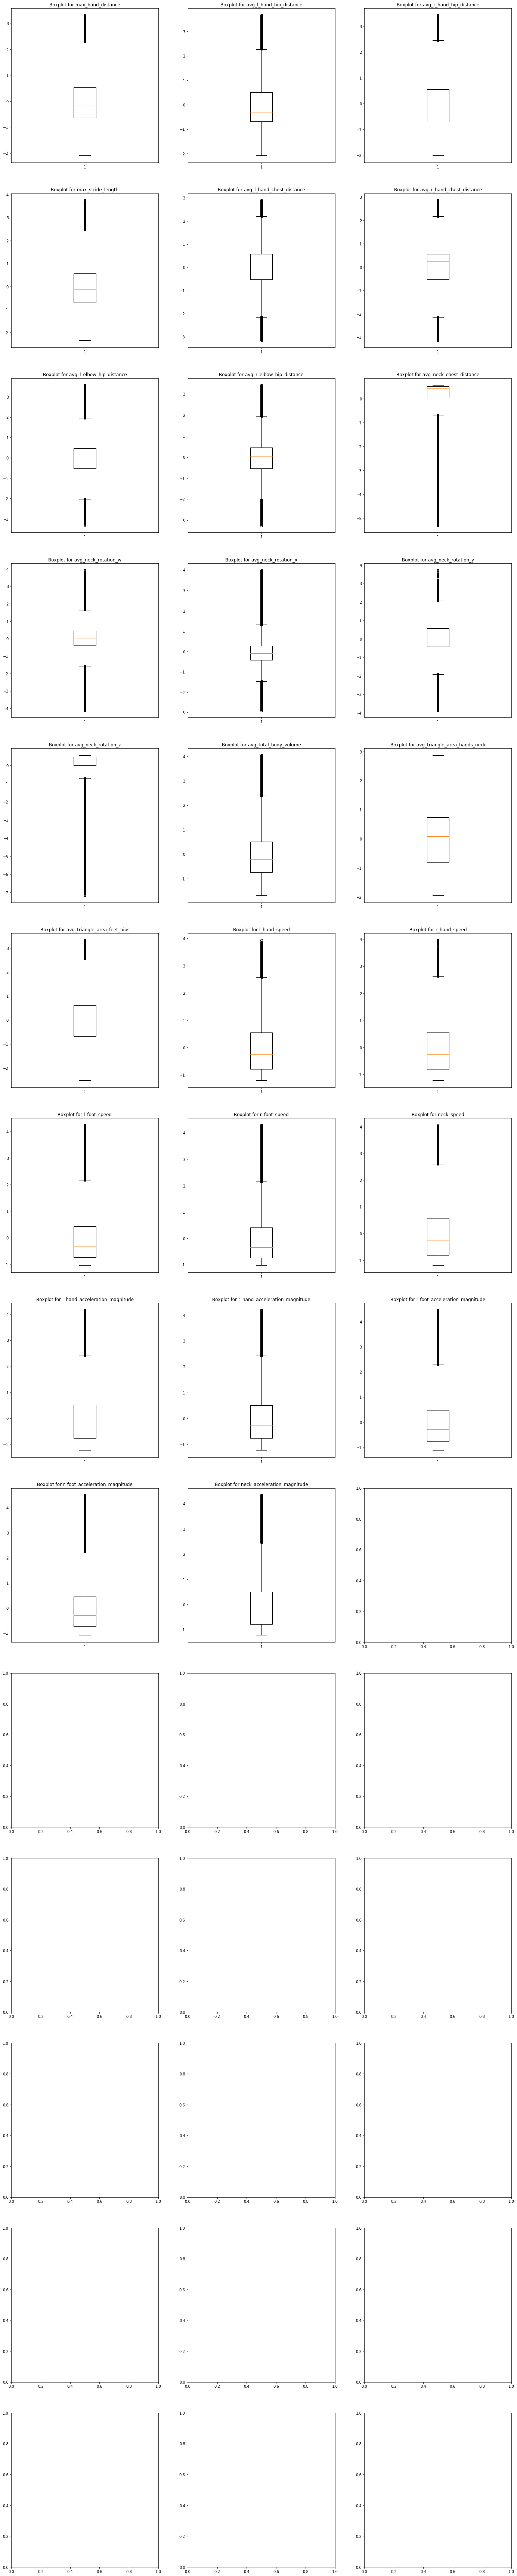

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_neck_chest_distance,avg_neck_rotation_w,...,l_hand_speed,r_hand_speed,l_foot_speed,r_foot_speed,neck_speed,l_hand_acceleration_magnitude,r_hand_acceleration_magnitude,l_foot_acceleration_magnitude,r_foot_acceleration_magnitude,neck_acceleration_magnitude
0,0.457194,-0.540068,-0.812587,0.632068,0.508141,0.319453,0.296885,-0.021475,0.491235,0.131753,...,0.082826,-0.341488,1.327846,0.507063,1.160663,-0.316146,-0.610819,0.751421,0.095899,0.777917
1,-0.484276,-0.559561,-0.856701,-0.620590,0.496794,0.290221,0.286176,-0.060716,0.495465,0.136400,...,-1.174529,-1.176235,-0.967247,-0.978514,-1.111911,-0.335931,-0.599793,0.797527,0.081493,0.794819
2,-0.479340,-0.551285,-0.894539,-0.454183,0.376881,0.177531,0.192590,-0.169313,0.490375,0.206713,...,0.209415,0.047025,-0.857027,-0.810646,-0.523313,-0.215822,-0.327098,-0.960610,-0.955258,-0.695744
3,-0.249730,0.288195,0.185775,0.464327,0.037321,0.182388,-0.073519,0.031956,0.486014,0.398576,...,0.569493,0.521369,1.573601,0.314414,0.909586,-0.350356,-0.390947,0.874022,0.049770,0.744355
4,-0.010590,0.707298,1.476303,0.693550,-0.494757,0.949369,-0.598352,1.235551,0.493897,0.491116,...,-0.812716,-0.599734,-0.514560,-0.619999,-0.468732,-0.155849,-0.359471,0.782446,-0.066821,-0.036026


In [56]:
numeric_vars = minMaxData.select_dtypes(include='number').columns
rows = 14
cols = 3

fig, axs = plt.subplots(rows, cols, figsize=(cols * 8, rows * 9))
i, j = 0, 0

off=0
for n in range(len(numeric_vars)):
    num_unique = len(list(set(minMaxData[numeric_vars[n]].values)))
    #only boxplot non boolean vars
    if num_unique == 2:
        off+=1
    else:
        axs[i, j].set_title('Boxplot for %s'%numeric_vars[n])
        axs[i, j].boxplot(minMaxData[numeric_vars[n]].dropna().values)
        i, j = (i + 1, 0) if (n+1-off) % cols == 0 else (i, j + 1)
plt.show()

minMaxData.head()

In [57]:
#Store MinMaxScaler

minMaxDataFull = minMaxData.join(target, how='right')
minMaxDataFull.to_csv(r'datasets/Fs2_B_O_S_DANCE_WALK_KIN_0.5sec.csv', index = False)

joblib.dump(transf, r'datasets/scalers/standardizers/Fs2_B_O_S_DANCE_WALK_KIN_0.5sec.pkl') 

['datasets/scalers/standardizers/Fs2_B_O_S_DANCE_WALK_KIN_0.5sec.pkl']

In [44]:
data = pd.read_csv('datasets/Fs_B_S_DANCE_WALK_0.5sec.csv')
scaler = joblib.load(r'datasets/scalers/standardizers/Fs_B_S_DANCE_WALK_0.5sec.pkl') 

data.head()

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,r_foot_speed,neck_speed,l_hand_acceleration_magnitude,r_hand_acceleration_magnitude,l_foot_acceleration_magnitude,r_foot_acceleration_magnitude,neck_acceleration_magnitude,EMOTION_P,EMOTION_A,EMOTION_D
0,1.903753,1.588572,1.678763,-1.187357,1.800153,2.039692,1.861975,2.153641,-0.494162,0.828131,...,-1.150469,-1.354722,-1.204255,-1.147149,-1.163977,-1.170814,-1.157166,-0.35,0.7,-0.8
1,1.906745,1.590201,1.682317,-1.191447,1.800693,2.041915,1.862519,2.156182,-0.494601,0.815993,...,-1.137195,-1.362549,-1.177056,-1.143493,-1.177174,-1.196791,-1.166618,-0.35,0.7,-0.8
2,1.896304,1.597945,1.686069,-1.193879,1.801296,2.043146,1.863016,2.157581,-0.492221,0.797046,...,-1.134306,-1.349971,-1.205267,-1.147625,-1.188233,-1.200799,-1.162996,-0.35,0.7,-0.8
3,1.893984,1.594455,1.675127,-1.192609,1.797257,2.035315,1.858726,2.148670,-0.494535,0.805367,...,-1.091173,-1.344425,-1.160342,-1.143008,-1.147106,-1.146426,-1.151700,-0.35,0.7,-0.8
4,1.893703,1.557052,1.645349,-1.193006,1.784555,2.015532,1.844656,2.126216,-0.491558,0.830400,...,-1.135303,-1.359488,-1.175658,-1.135941,-1.171698,-1.148640,-1.158215,-0.35,0.7,-0.8


In [45]:
print(data.shape)

(18418, 30)
